In [185]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier

In [186]:
df = pd.read_excel("dataset/time_series_375_prerpocess_en.xlsx", index_col=[0,1])
df_clean = df.drop(columns=[ 'Admission time', 'Discharge time'])
df_clean = df_clean.groupby('PATIENT_ID').last()
df_clean = df_clean.astype(float)
df_clean

,age,gender,outcome,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,Prothrombin time,procalcitonin,eosinophils(%),Interleukin 2 receptor,...,mean corpuscular hemoglobin,Activation of partial thromboplastin time,Hypersensitive c-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
PATIENT_ID,,,,,,,,,,,,,,,,,,,,,
1,73.0,1.0,0.0,19.9,131.0,100.0,12.4,0.09,1.7,NaN,...,32.3,38.9,2.6,0.09,142.7,0.16,41.0,30.0,74.7,88.0
2,61.0,1.0,0.0,1.9,149.0,98.1,12.3,0.09,0.1,441.0,...,32.2,36.0,27.4,NaN,137.4,0.27,40.0,22.0,94.6,74.0
3,70.0,2.0,0.0,NaN,126.0,102.2,13.6,0.06,0.1,591.0,...,33.3,34.8,3.6,0.10,143.2,0.23,29.0,67.0,84.6,64.0
4,74.0,1.0,0.0,4.8,103.0,103.1,16.3,0.38,2.5,NaN,...,39.2,NaN,14.5,0.11,144.2,0.27,72.0,26.0,74.2,88.0
5,29.0,2.0,0.0,5.6,130.0,102.2,14.6,0.02,3.0,258.0,...,30.0,NaN,0.8,0.08,143.6,0.36,11.0,18.0,122.8,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,63.0,1.0,1.0,1741.5,143.0,95.7,14.4,1.51,0.0,758.0,...,30.4,43.8,152.0,NaN,135.8,0.16,19.0,31.0,88.6,81.0
372,79.0,1.0,1.0,45.0,102.0,119.8,29.5,1.14,0.2,1833.0,...,30.4,55.3,177.6,0.06,155.4,0.07,93.0,121.0,12.9,364.0
373,61.0,2.0,1.0,124.8,100.0,102.6,14.9,0.56,0.1,NaN,...,27.6,36.7,205.8,NaN,141.6,0.18,NaN,9.0,101.3,47.0


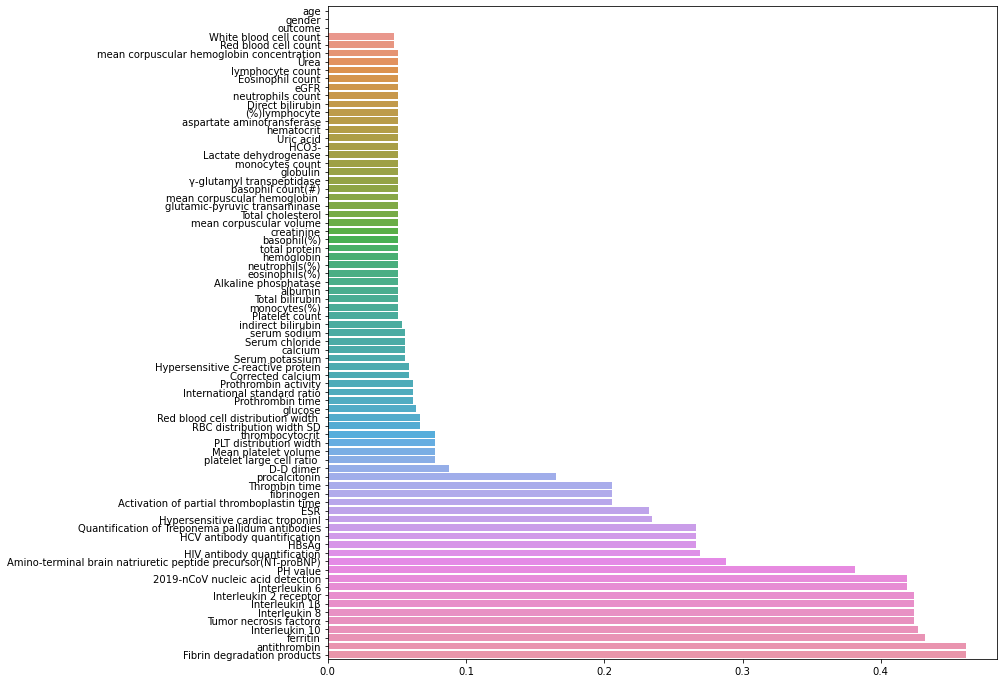

In [189]:
dados_faltantes = df_clean.isna().mean().sort_values(ascending=True)
plt.figure(figsize=(12,12));
sns.barplot(x=dados_faltantes, y=dados_faltantes.index);

In [169]:
sel_col = df_clean.columns[(df_clean.isna().mean() <= 0.2).values]
df_clean[sel_col]

,age,gender,outcome,hemoglobin,Serum chloride,Prothrombin time,procalcitonin,eosinophils(%),Alkaline phosphatase,albumin,...,γ-glutamyl transpeptidase,International standard ratio,basophil count(#),mean corpuscular hemoglobin,Hypersensitive c-reactive protein,serum sodium,thrombocytocrit,glutamic-pyruvic transaminase,eGFR,creatinine
PATIENT_ID,,,,,,,,,,,,,,,,,,,,,
1,73.0,1.0,0.0,131.0,100.0,12.4,0.09,1.7,71.0,37.6,...,41.0,0.92,0.02,32.3,2.6,142.7,0.16,30.0,74.7,88.0
2,61.0,1.0,0.0,149.0,98.1,12.3,0.09,0.1,45.0,37.2,...,50.0,0.92,0.03,32.2,27.4,137.4,0.27,22.0,94.6,74.0
3,70.0,2.0,0.0,126.0,102.2,13.6,0.06,0.1,69.0,38.4,...,53.0,1.04,0.01,33.3,3.6,143.2,0.23,67.0,84.6,64.0
4,74.0,1.0,0.0,103.0,103.1,16.3,0.38,2.5,79.0,34.1,...,14.0,1.29,0.02,39.2,14.5,144.2,0.27,26.0,74.2,88.0
5,29.0,2.0,0.0,130.0,102.2,14.6,0.02,3.0,84.0,39.5,...,21.0,1.13,0.04,30.0,0.8,143.6,0.36,18.0,122.8,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,63.0,1.0,1.0,143.0,95.7,14.4,1.51,0.0,65.0,30.7,...,27.0,1.10,0.00,30.4,152.0,135.8,0.16,31.0,88.6,81.0
372,79.0,1.0,1.0,102.0,119.8,29.5,1.14,0.2,180.0,16.7,...,135.0,2.76,0.07,30.4,177.6,155.4,0.07,121.0,12.9,364.0
373,61.0,2.0,1.0,100.0,102.6,14.9,0.56,0.1,141.0,23.9,...,39.0,1.18,0.01,27.6,205.8,141.6,0.18,9.0,101.3,47.0


In [170]:
Y = df_clean.outcome
X = df_clean.drop(columns=["outcome"])

In [171]:
import_feature = pd.DataFrame(columns=X.columns)
for i in range(100): # 50,150
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=i)
    model = XGBClassifier(
                max_depth=4
                ,learning_rate=0.2
                ,reg_lambda=1
                ,n_estimators=150
                ,subsample = 0.9
                ,colsample_bytree = 0.9)
    model.fit(x_train, y_train)
    import_feature = import_feature.append(pd.DataFrame(model.feature_importances_, index=X.columns).transpose())
import_feature.mean().sort_values(ascending=False).head(10)

Lactate dehydrogenase                0.343863
neutrophils(%)                       0.117550
Hypersensitive c-reactive protein    0.061524
(%)lymphocyte                        0.024522
Hypersensitive cardiac troponinI     0.021645
procalcitonin                        0.021552
serum sodium                         0.018634
Prothrombin time                     0.018541
aspartate aminotransferase           0.017956
Prothrombin activity                 0.017665
dtype: float32

In [172]:
X_best = X[import_feature.mean().sort_values(ascending=False).head(4).index]
X_best

,Lactate dehydrogenase,neutrophils(%),Hypersensitive c-reactive protein,(%)lymphocyte
PATIENT_ID,,,,
1,206.0,64.3,2.6,25.9
2,282.0,84.7,27.4,9.2
3,226.0,66.4,3.6,27.3
4,249.0,72.1,14.5,16.5
5,179.0,65.5,0.8,23.6
...,...,...,...,...
371,573.0,79.5,152.0,15.0
372,607.0,98.1,177.6,0.6
373,702.0,89.0,205.8,6.3


In [173]:
x_train, x_test, y_train, y_test = train_test_split(X_best, Y, test_size=0.3, random_state=3463)
model = XGBClassifier(
                max_depth=4
                ,learning_rate=0.2
                ,reg_lambda=1
                ,n_estimators=150
                ,subsample = 0.9
                ,colsample_bytree = 0.9)
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [180]:
predict_labels = model.predict(x_test)
confusion_matrix_ = confusion_matrix(y_test, predict_labels)
pd.DataFrame(confusion_matrix_, index=["Sobreviveu", "morreu"], columns=["Previsto como Sobrevivente", "Previsto como morto"])

,Previsto como Sobrevivente,Previsto como morto
Sobreviveu,56,5
morreu,1,51
